<center><h1 style="line-height:200%;color:#0099cc">
MiniProject1
</h1>

<h2 style="line-height:200%;color:#0099cc">
Parameters And Assumptions
</h2>

**Le**: Life Expentancy     
**age_s**: The age at which he\she begins working       
**s**: The percentage of his\her salary that he\she pays to the pension fund    
**a**: "a" is the percentage of the last yearly salary that is used to calculate the first pension payment (first payment = a*last yearly salary)  
**w**: Initial salary   
**g_p**: Pension payment annual growth rate    
**g_w**: Salary annual growth rate     
**r_d**: Dicount rate   
**r**: Pension fund annual return rate  
**n**: The number of years a person has contributed to their pension fund is shown by this parameter    
**L**: Shows how many year the annuitant will use the retirement benefits


In the interest of simplicity, we assume that the annuitant will use the retirement benefits until he\she die. This assumption is also reflected in the equation below.
$$Le = n + L + age_{s}$$
Furthermore, it is assumed that this pension fund is comprised of just **one member**.

<hr>

<h3 style="line-height:200%;color:#0099cc">
Part A
</h3>

<h4 style="line-height:200%;color:#0099cc">
Importing Libraries and Modules
</h4>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### The command below turn off warning about chained assignment
pd.options.mode.chained_assignment = None  # default='warn'


<h4 style="line-height:200%;color:#0099cc">
Values of Parameters in The MiniProject
</h4>

In [37]:
"""
L_e = 70
age_s = 20
s = 30
a = 80
w = 1
g_p = 20
g_w = 20
r_d = 14
r = 17
n = 40
L = L_e - n - age_s
""";

status function consists of three inner functions. It Sets up a dataframe containing three columns: saving_flow(contribution), retirement_payments, balance

In [38]:
def status(L_e, age_s, s, a, w, g_p, g_w, r, n, L):
    """
    Set up a dataframe(main_data) containing three columns: saving_flow, retirement_payments, balance
    L_e: Life expantancy 
    age_s: The age at which he\she begins working
    s: The percentage of his\her salary that he\she pays to the pension fund
    a: "a" is the percentage of the last yearly salary that is used to calculate the first pension payment
    w: Initial salary
    g_p: Pension payment annual growth rate
    g_w: Salary growth rate
    r: Pension fund annual return rate
    n: The number of years a person has contributed to their pension fund is shown by this parameter
    L: It's equal to (L_e - n - age_s)
    """
    main_data = pd.DataFrame()
    
    def salary():
        """
        Adds a column of annual salary to main_data
        """
        data = np.array([w *(1 + g_w/100) ** x for x in range(0,n)] + [0]*L)
        main_data["salary"] = data
        main_data.index = np.array([x for x in range(age_s+1,L_e+1)])
    
    salary()

    def saving_flow():
        """
        Adds a column of input cashflow(contribution) from the member(form the end of "age_s" to the end of "L_e") to the main_data
        """
        main_data["saving_flow"] = main_data["salary"] * s/100
    
    saving_flow()

    def retirement_payments():
        """
        Adds an array of retirement payments(from "age_s" to "L_e") to the main_data
        """
        last_salary = main_data.loc[age_s+n, "salary"]
        first_payment = last_salary * a / 100
        data2 = np.array([0]*n + [first_payment*(1 + g_p/100)**j for j in range(0,L)])
        main_data["retirement_payments"] = data2

    retirement_payments()


    ####  Even though I tried my hardest, I could not avoid using a "For Loop" in the function below.
    def balance():
        """
        Adds an array of balance status(from "age_s" to "L_e") to the main_data
        """
        main_data['balance'] = main_data.saving_flow - main_data.retirement_payments
        for index,row in main_data.iterrows():
            if index == age_s+1:
                continue
            main_data.balance.loc[index] = main_data.balance.loc[index] + main_data.balance.loc[index-1] * (1 + r/100)
    
    balance()

    return main_data

status_dataframe = status(L_e = 70, age_s = 20, s = 30, a = 80, w = 1, g_p = 20, g_w = 20, r = 17, n = 40, L = 10)
status_dataframe


,salary,saving_flow,retirement_payments,balance
21,1.000000,0.300000,0.000000,0.300000
22,1.200000,0.360000,0.000000,0.711000
23,1.440000,0.432000,0.000000,1.263870
24,1.728000,0.518400,0.000000,1.997128
25,2.073600,0.622080,0.000000,2.958720
26,2.488320,0.746496,0.000000,4.208198
27,2.985984,0.895795,0.000000,5.819387
28,3.583181,1.074954,0.000000,7.883637
29,4.299817,1.289945,0.000000,10.513800
30,5.159780,1.547934,0.000000,13.849080


<h4 style="line-height:200%;color:#0099cc">
Plotting
</h4>

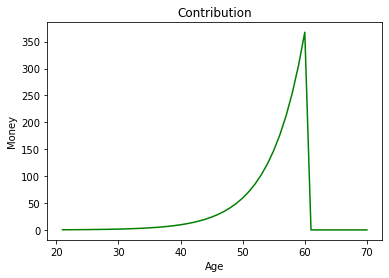

In [39]:
fig1, ax1 = plt.subplots()

ax1.plot(status_dataframe.saving_flow, color='green')
ax1.set_title("Contribution")
ax1.set_ylabel('Money')
ax1.set_xlabel('Age');

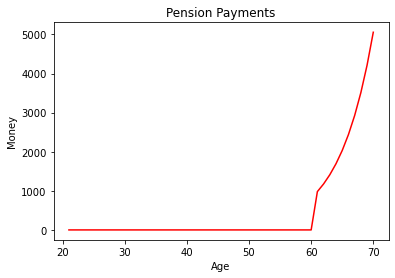

In [40]:
fig2, ax2 = plt.subplots()

ax2.plot(status_dataframe.retirement_payments, color='red')
ax2.set_title("Pension Payments")
ax2.set_ylabel('Money')
ax2.set_xlabel('Age');

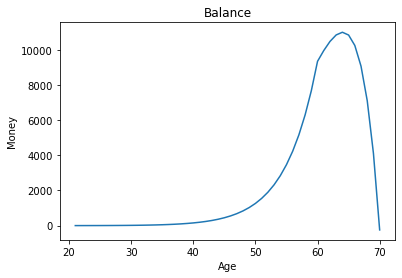

In [41]:
fig3, ax3 = plt.subplots()

ax3.plot(status_dataframe.balance)
ax3.set_title("Balance")
ax3.set_ylabel('Money')
ax3.set_xlabel('Age');

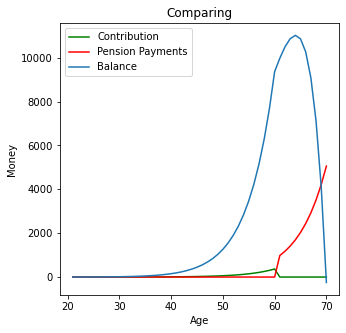

In [42]:
fig4, ax4 = plt.subplots(figsize=(5,5))

ax4.plot(status_dataframe.saving_flow, color='green', label="Contribution")
ax4.plot(status_dataframe.retirement_payments, color='red', label="Pension Payments")
ax4.plot(status_dataframe.balance, label="Balance")
ax4.set_title("Comparing")
ax4.set_ylabel('Money')
ax4.set_xlabel('Age')
ax4.legend();


<h3 style="line-height:200%;color:#0099cc">
Part B
</h3>

The NPV of the Pension Fund is actually the present value of the difference between balance of each year:
$$NPV = \frac{balance_1}{1 + r_d} + \sum\nolimits_{n> 2} \frac{balance_{n} - balance_{n-1}}{(1 + r_d)^{n}}$$

In [43]:
L_e = 70  
age_s = 20  
r_d = 14
def NPV_pension(n):
    """
    Returns NPV of the pension fund
    """
    L = L_e - n - age_s
    temp_dataframe = status(70, 20, 30, 80, 1, 20, 20, 17, n, L)
    temp_balance = temp_dataframe.balance.diff().fillna(status_dataframe['balance'].loc[age_s+1])  ## difference between each row, index={21,22,...,70}
    temp_balance.index -= age_s  ## change index to {1,2,...,50}
    DCF = temp_balance.divide( (1 + r_d/100) ** temp_balance.index) ### dicounted blance each year 
    npv = DCF.sum()
    return npv

print("Answer to Part B:", NPV_pension(40))

Answer to Part B: 110.18098813247087


<h4 style="line-height:200%;color:#0099cc">
NPV vs n
</h4>

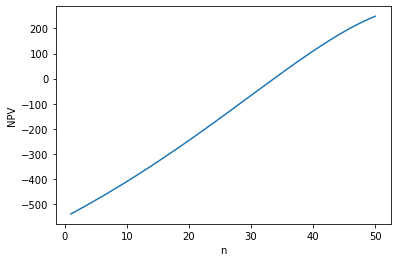

In [44]:
fig5, ax5 = plt.subplots()

NPV_dataframe = pd.DataFrame({'NPV':[NPV_pension(x) for x in range(1,51)]})
NPV_dataframe.index += 1

ax5.plot(NPV_dataframe)
ax5.set_ylabel("NPV")
ax5.set_xlabel("n");

<h3 style="line-height:200%;color:#0099cc">
Part C
</h3>

In [45]:
from scipy import optimize

def NPV_pension_2(n, r):
    """
    Returns NPV of the pension fund according to rate of return of pension fundand "n".
    Due to optimize.brentq only accepting functions with continuous inputs, I used int(n) instead of n(status don't accept float for number of years of work(n))
    """
    n = int(n)
    L = L_e - n - age_s
    temp_dataframe = status(70, 20, 30, 80, 1, 20, 20, r, n, L)
    temp_balance = temp_dataframe.balance.diff().fillna(status_dataframe['balance'].loc[age_s+1])  ## difference between each row, index={21,22,...,70}
    temp_balance.index -= age_s  ## index={1,2,...,50}
    DCF = temp_balance.divide( (1 + r_d/100) ** temp_balance.index) ### dicounted blance each year 
    npv = DCF.sum()
    return npv


def root_finder(return_rate): 
    """
    Returns the "n" for given return rate if NPV is approximately zero
    "n" is rounded to the nearest integer
    """   
    root = optimize.brentq(NPV_pension_2, 1, 50, args=(return_rate))
    return round(root)

print("Answer to Part C:", root_finder(17))

Answer to Part C: 34


<h4 style="line-height:200%;color:#0099cc">
n vs Rate of Return
</h4>

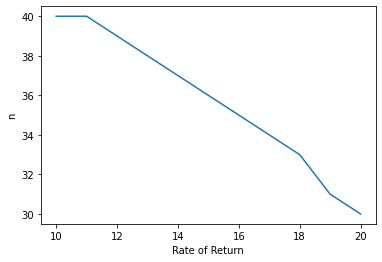

In [46]:
def n_RoR(lower, upper, step):
    """
    Returns "n" for each rate of return(from lower to upper rate of return with defined step)
    lower: lower bound of rate of return
    upper: upper bound of rate of return
    step: step
    """
    roots = pd.DataFrame({'n':[root_finder(x) for x in np.arange(lower, upper, step)]})
    roots.index = np.arange(lower, upper, step)
    return roots


fig6, ax6 = plt.subplots()
ax6.plot(n_RoR(10, 21, 1))
ax6.set_xlabel('Rate of Return')
ax6.set_ylabel('n');


<h3 style="line-height:200%;color:#0099cc">
Part D
</h3>
I've made two modification to status function(which yield status_modified). First you can give either "int" or "dict" to "g_w" and "r". For example if you give {1:20, 10:18, 20: 16} to the "g_w" it means that in the beginning g_w is "20" percent, at the beginning of the 10th year g_w changes to "18" percent and at the beginning of the 20th year g_w changes to "16" percent. This patter also applies to "r".

In [47]:
def status_modified(L_e, age_s, s, a, w, g_p, g_w, r, n, L):
    """
    Set up a dataframe(main_data) containing three columns: saving_flow, retirement_payments, balance
    it is "modified" because you can change "g_w" and "r" each year just by giving dictionary to "status_modified"
    L_e: Life expantancy 
    age_s: The age at which he\she begins working
    s: The percentage of his\her salary that he\she pays to the pension fund
    a: "a" is the percentage of the last yearly salary that is used to calculate the first pension payment
    w: Initial salary
    g_p: Pension payment annual growth rate
    g_w: Salary growth rate
    r: Pension fund annual return rate
    n: The number of years a person has contributed to their pension fund is shown by this parameter
    L: It's equal to (L_e - n - age_s)
    """
    main_data = pd.DataFrame()

    ####  Here is the first modification
    ####  Even though I tried my hardest, I could not avoid using a "For Loop" in the function below.
    if type(g_w) == dict:
        def salary():
            """
            Adds an array with input of salary
            """
            main_data["salary"] = np.array([0] * (n + L))
            main_data.index = np.array([x for x in range(age_s+1,L_e+1)])
            wage_growth_rate = 0
            for index, row in main_data.iterrows():
                year_of_working = index - age_s
                if year_of_working in g_w:
                    wage_growth_rate = g_w[year_of_working]
                if index == age_s+1:
                    main_data.loc[index, "salary"] = w 
                    continue
                main_data.loc[index, "salary"] = main_data.loc[index-1, "salary"] * (1 + wage_growth_rate/100)
                if year_of_working == n:
                    break
    else:
        def salary():
            """
            Adds an array with input of salary
            """
            data = np.array([w *(1 + g_w/100) ** x for x in range(0,n)] + [0]*L)
            main_data["salary"] = data
            main_data.index = np.array([x for x in range(age_s+1,L_e+1)])
    
    salary()
    
    def saving_flow():
        """
        Adds a column of input cashflow(contribution) from the member(form the end of "age_s" to the end of "L_e") to the main_data
        """
        main_data["saving_flow"] = main_data["salary"] * s/100

    saving_flow()

    def retirement_payments():
        """
        Adds an array of retirement payments(from "age_s" to "L_e") to the main_data
        """
        last_salary = main_data.loc[age_s+n, "salary"]
        first_payment = last_salary * a / 100
        data2 = np.array([0]*n + [first_payment*(1 + g_p/100)**j for j in range(0,L)])
        main_data["retirement_payments"] = data2
        
    retirement_payments()

    ####  Here is the second modification
    ####  Here I defined balance for two situations: 1) fixed rate of return
    ####                                             2) variable rate of return. In this case you should give a dictionary in below format:
    ####                                                        r = {year_of_membership: rate}. e.g: {1: 17, 10: 13}
    ####  Even though I tried my hardest, I could not avoid using a "For Loop" in the function below.
    if type(r) == dict:
        def balance():
            """
            Adds an array of balance status(from "age_s" to "L_e") to the main_data
            """
            main_data['balance'] = main_data.saving_flow - main_data.retirement_payments
            rate_of_return = 0
            for index,row in main_data.iterrows():
                year_of_membership = index-age_s
                if year_of_membership in r:
                    rate_of_return = r[year_of_membership]
                if index == age_s+1:
                    continue
                main_data.balance.loc[index] = main_data.balance.loc[index] + main_data.balance.loc[index-1] * (1 + rate_of_return/100)
    
    else:       
        def balance():
            """
            Adds an array of balance status(from "age_s" to "L_e") to the main_data
            """
            main_data['balance'] = main_data.saving_flow - main_data.retirement_payments
            for index,row in main_data.iterrows():
                if index == age_s+1:
                    continue
                main_data.balance.loc[index] = main_data.balance.loc[index] + main_data.balance.loc[index-1] * (1 + r/100)

    balance()

    return main_data




Answer for Part D

In [48]:
### {1:20, 10:18} means from first year g_w=20 and from 10th year of working g_w=18
answer_d = status_modified(70, 20, 30, 80, 1, 20, {1:20, 10:18}, 17, 40, 10)
answer_d

,salary,saving_flow,retirement_payments,balance
21,1.000000,0.300000,0.000000,0.300000
22,1.200000,0.360000,0.000000,0.711000
23,1.440000,0.432000,0.000000,1.263870
24,1.728000,0.518400,0.000000,1.997128
25,2.073600,0.622080,0.000000,2.958720
26,2.488320,0.746496,0.000000,4.208198
27,2.985984,0.895795,0.000000,5.819387
28,3.583181,1.074954,0.000000,7.883637
29,4.299817,1.289945,0.000000,10.513800
30,5.073784,1.522135,0.000000,13.823281


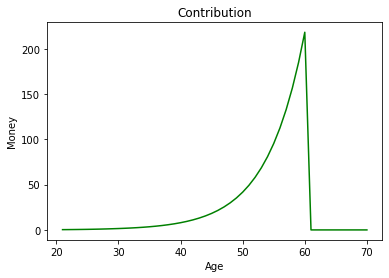

In [49]:
fig7, ax7 = plt.subplots()

ax7.plot(answer_d.saving_flow, color='green')
ax7.set_title("Contribution")
ax7.set_ylabel('Money')
ax7.set_xlabel('Age');

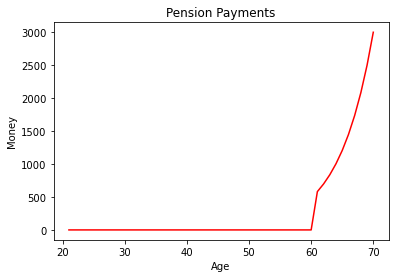

In [50]:
fig8, ax8 = plt.subplots()

ax8.plot(answer_d.retirement_payments, color='red')
ax8.set_title("Pension Payments")
ax8.set_ylabel('Money')
ax8.set_xlabel('Age');

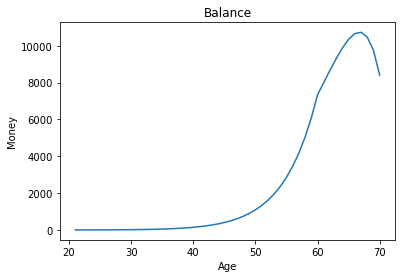

In [51]:
fig9, ax9 = plt.subplots()

ax9.plot(answer_d.balance)
ax9.set_title("Balance")
ax9.set_ylabel('Money')
ax9.set_xlabel('Age');

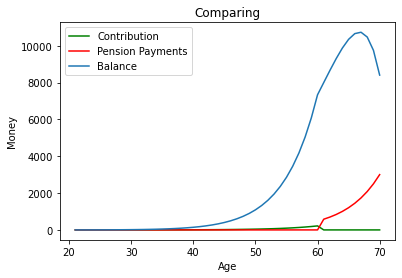

In [52]:
fig10, ax10 = plt.subplots()

ax10.plot(answer_d.saving_flow, color='green', label="Contribution")
ax10.plot(answer_d.retirement_payments, color='red', label="Pension Payments")
ax10.plot(answer_d.balance, label="Balance")
ax10.set_title("Comparing")
ax10.set_ylabel('Money')
ax10.set_xlabel('Age')
ax10.legend();
